In [81]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [82]:
from collections import Counter
location=[]
label=[]
with open('data/semi_fungi/l_train.txt', 'r') as f:
    for line in f:
        # Split each line by whitespace
        parts = line.split()
        # Append the first part to location and the second part as an integer to label
        location.append(parts[0])
        label.append(int(parts[-1]))
print(label)

label_counts = Counter(label)


# Group labels by frequency and shuffle within each frequency group
sorted_label_counts = sorted(label_counts.items(), key=lambda x: -x[1])  # Sort by frequency (desc)
print(sorted_label_counts)
frequencies = {}
sorted_labels=[]
for label, freq in sorted_label_counts:
    sorted_labels.append(label)
print(sorted_labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 

This is the code for heatmap. Change threshold accordingly

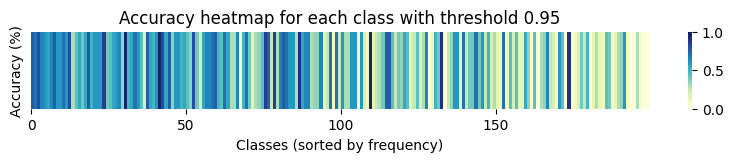

In [83]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
data = np.loadtxt("results/semi_fungi_PL_in_thres_95/test/pl.txt", dtype=int)
# Split data into target and predicted labels
y_true = data[:, 0]  # target labels (first column)
y_pred = data[:, 1]  # predicted labels (second column)

# Count the number of true positives for each class
true_positives = {}
unique_classes = np.unique(y_true)

for cls in unique_classes:
    true_positives[cls] = np.sum((y_true == cls) & (y_pred == cls))

# Assuming `sorted_labels` is defined and corresponds to the unique classes in sorted order
# Create a list to store true positives in the order of frequency
ordered_true_positives = [true_positives[cls] for cls in sorted_labels]

# Prepare heatmap data
heatmap_data1 = np.array(ordered_true_positives).reshape(1, -1)
#heatmap_data1 = heatmap_data1
heatmap_data1 = heatmap_data1/20
# Create the heatmap
plt.figure(figsize=(10, 1))  # Adjust the size as needed
sns.heatmap(heatmap_data1, annot=False, cmap='YlGnBu', cbar=True, vmin=0, vmax=1, yticklabels=False, xticklabels=False)

# Set the title and labels
plt.title('Accuracy heatmap for each class with threshold 0.95')
plt.xlabel('Classes (sorted by frequency)')
plt.ylabel('Accuracy (%)')

# Set x-ticks to label only every 50th position
num_classes = len(sorted_labels)  # Total number of classes
xticks_positions = np.arange(0, num_classes, 50)  # Positions for x-ticks (0, 50, 100, ...)
xticks_labels = [i for i in xticks_positions if i < num_classes]  # Corresponding labels
 # Apply the ticks and labels
plt.xticks(ticks=xticks_positions, labels=xticks_labels)  # Apply the ticks and labels
# Ensure x-axis limits fit the labels
plt.xlim(-0.5, num_classes - 0.5)

plt.show()


Code for delta change graph

In [84]:
data = np.loadtxt("results/semi_fungi_PL_in_thres_80/test/pl.txt", dtype=int)

# Split data into target and predicted labels
y_true = data[:, 0]  # target labels (first column)
y_pred = data[:, 1]  # predicted labels (second column)

# Count the number of true positives for each class
true_positives = {}
unique_classes = np.unique(y_true)

for cls in unique_classes:
    true_positives[cls] = np.sum((y_true == cls) & (y_pred == cls))

# Create a list to store true positives in the order of frequency
ordered_true_positives = [true_positives[cls] for cls in sorted_labels]

heatmap_data1 = np.array(ordered_true_positives).reshape(1, -1)

In [85]:
data = np.loadtxt("results/semi_fungi_PL_in_thres_95/test/pl.txt", dtype=int)

# Split data into target and predicted labels
y_true = data[:, 0]  # target labels (first column)
y_pred = data[:, 1]  # predicted labels (second column)

# Count the number of true positives for each class
true_positives = {}
unique_classes = np.unique(y_true)

for cls in unique_classes:
    true_positives[cls] = np.sum((y_true == cls) & (y_pred == cls))

# Create a list to store true positives in the order of frequency
ordered_true_positives = [true_positives[cls] for cls in sorted_labels]

heatmap_data2 = np.array(ordered_true_positives).reshape(1, -1)

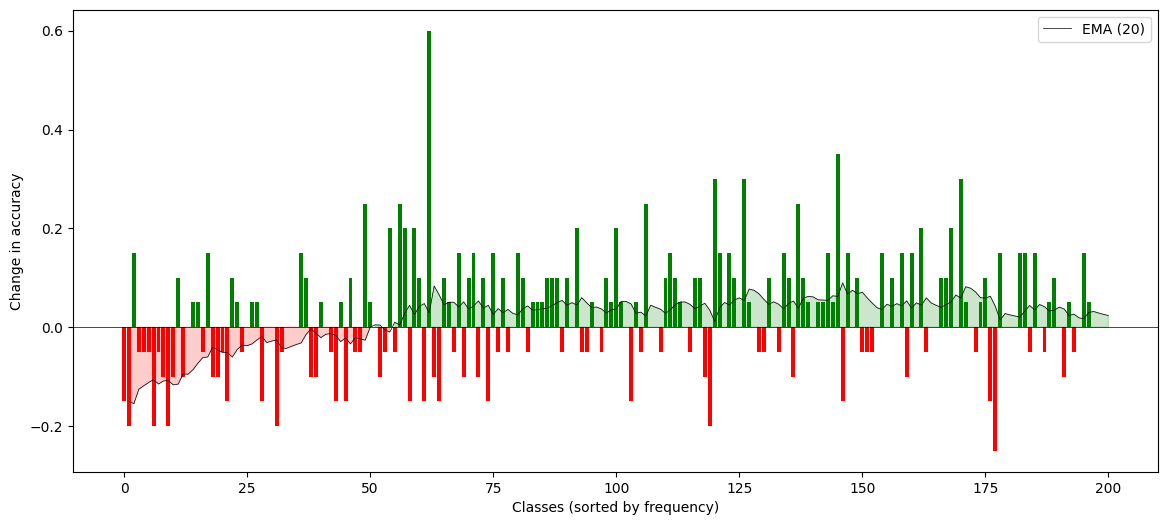

In [86]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#0.2 = 0.6 - 0.4
difference_data = heatmap_data2[0]/20 - heatmap_data1[0]/20
# Replace this with your actual TP data for 200 classes
tp_counts = difference_data  # Example data with some values below zero
classes = np.arange(1, len(tp_counts) + 1)

# Calculate EMA with pandas for smoother trend line
tp_series = pd.Series(tp_counts)
ema_tp_counts = tp_series.ewm(span=20, adjust=False).mean().values  # Span controls the level of smoothing

values = difference_data.flatten()
# Plot the bar graph for TP counts
plt.figure(figsize=(14, 6))
bars = plt.bar(np.arange(len(difference_data)), values, color=['green' if v > 0 else 'red' for v in values])
# Overlay the EMA line
plt.plot(classes, ema_tp_counts, color="black", linewidth=0.5, label="EMA (20)")

# Fill the region between EMA line and zero line
plt.fill_between(classes, ema_tp_counts, 0, where=(ema_tp_counts >= 0), color="green", alpha=0.2)
plt.fill_between(classes, ema_tp_counts, 0, where=(ema_tp_counts < 0), color="red", alpha=0.2)

# Add labels and title
#plt.title("Change in accuracy from threshold 0.80 to 0.95 for each class")
plt.xlabel("Classes (sorted by frequency)")
plt.ylabel("Change in accuracy")
plt.axhline(0, color="black", linewidth=0.5)  # Add a baseline at y=0
plt.legend()

plt.show()


Code for analysing class based

In [87]:
data = np.loadtxt("results/semi_fungi_PL_in_thres_95/test/pl.txt", dtype=int)
#data = np.loadtxt("results/semi_fungi_PL_classbased/test/pl.txt", dtype=int)

# Split data into target and predicted labels
y_true = data[:, 0]  # target labels (first column)
y_pred = data[:, 1]  # predicted labels (second column)

# Count the number of true positives for each class
true_positives = {}
unique_classes = np.unique(y_true)

for cls in unique_classes:
    true_positives[cls] = np.sum((y_true == cls) & (y_pred == cls))

# Create a list to store true positives in the order of frequency
ordered_true_positives = [true_positives[cls] for cls in sorted_labels]

heatmap_data1 = np.array(ordered_true_positives).reshape(1, -1)

In [88]:
data = np.loadtxt("results/semi_fungi_PL_classbased/test/pl.txt", dtype=int)

# Split data into target and predicted labels
y_true = data[:, 0]  # target labels (first column)
y_pred = data[:, 1]  # predicted labels (second column)

# Count the number of true positives for each class
true_positives = {}
unique_classes = np.unique(y_true)

for cls in unique_classes:
    true_positives[cls] = np.sum((y_true == cls) & (y_pred == cls))

# Create a list to store true positives in the order of frequency
ordered_true_positives = [true_positives[cls] for cls in sorted_labels]

heatmap_data2 = np.array(ordered_true_positives).reshape(1, -1)

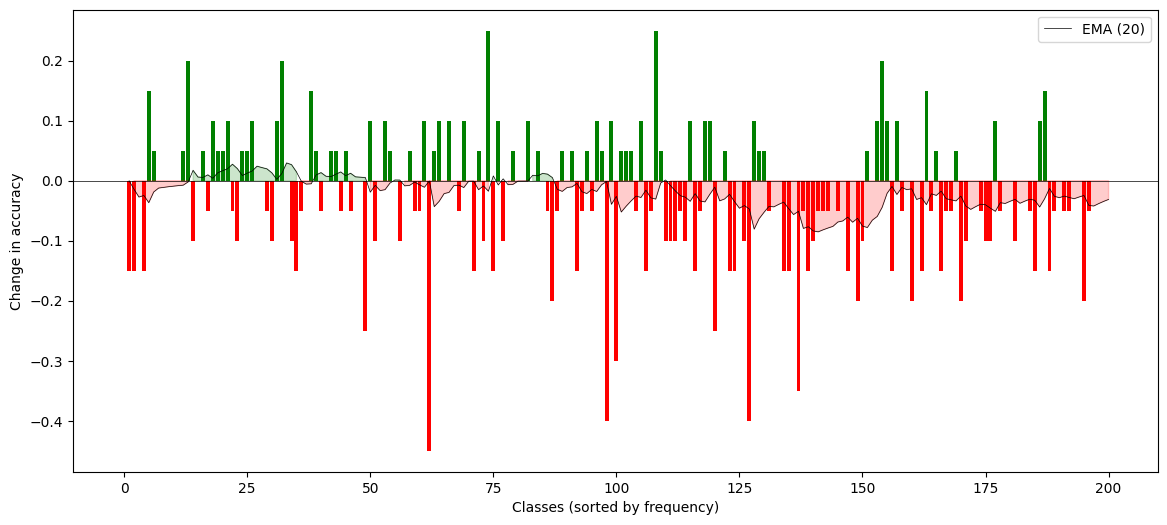

In [89]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#0.2 = 0.6 - 0.4
difference_data = heatmap_data2[0]/20 - heatmap_data1[0]/20
# Replace this with your actual TP data for 200 classes
tp_counts = difference_data  # Example data with some values below zero
classes = np.arange(1, len(tp_counts) + 1)

# Calculate EMA with pandas for smoother trend line
tp_series = pd.Series(tp_counts)
ema_tp_counts = tp_series.ewm(span=20, adjust=False).mean().values  # Span controls the level of smoothing

values = difference_data.flatten()
# Plot the bar graph for TP counts
plt.figure(figsize=(14, 6))
bars = plt.bar(np.arange(len(difference_data)), values, color=['green' if v > 0 else 'red' for v in values])
# Overlay the EMA line
plt.plot(classes, ema_tp_counts, color="black", linewidth=0.5, label="EMA (20)")

# Fill the region between EMA line and zero line
plt.fill_between(classes, ema_tp_counts, 0, where=(ema_tp_counts >= 0), color="green", alpha=0.2)
plt.fill_between(classes, ema_tp_counts, 0, where=(ema_tp_counts < 0), color="red", alpha=0.2)

# Add labels and title
#plt.title("Change in accuracy from threshold 0.80 to 0.95 for each class")
plt.xlabel("Classes (sorted by frequency)")
plt.ylabel("Change in accuracy")
plt.axhline(0, color="black", linewidth=0.5)  # Add a baseline at y=0
plt.legend()

plt.show()
